In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, metrics
import matplotlib.pyplot as plt
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [15]:
LABELS = ['label_1', 'label_2', 'label_3', 'label_4']
FEATURES = ['feature_'+ str(i) for i in range(1,769)]

In [16]:
trainDf = pd.read_csv("./train.csv")
trainDf.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.071810,0.068413,-0.022749,0.086143,0.026361,-0.028817,0.199237,-0.287368,-0.059560,-0.043694,...,0.004646,0.123011,0.043040,-0.042152,0.026225,0.072623,45,NaN,1,6
1,0.030930,0.024088,0.057811,-0.230877,-0.146281,0.102807,0.128767,-0.146269,0.053893,0.055378,...,0.077742,0.081691,-0.004778,0.171727,-0.026027,0.171089,45,NaN,1,6
2,-0.044019,-0.004626,-0.029383,-0.165376,-0.026611,-0.028142,-0.009649,-0.082088,0.018933,0.006830,...,0.076249,-0.046272,0.027831,0.028096,0.030994,0.009709,45,NaN,1,6
3,-0.086241,0.129585,-0.013893,0.089885,-0.100300,-0.035184,0.240980,-0.128362,-0.072328,-0.019385,...,0.006934,-0.049213,0.078852,0.088323,0.168815,-0.049188,45,NaN,1,6
4,0.126416,0.088338,0.088307,0.020371,0.174417,-0.030560,0.181163,-0.009382,0.085396,0.015823,...,-0.028883,0.110844,-0.041875,0.025686,0.003534,-0.104945,45,NaN,1,6


In [17]:
validDf = pd.read_csv("./valid.csv")
validDf.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,-0.029340,-0.026572,0.006227,-0.157240,-0.126458,-0.016806,0.011338,-0.051527,-0.051583,-0.027086,...,0.047600,-0.012270,0.043381,-0.022228,0.046098,0.049717,45,NaN,1,6
1,0.092717,0.067198,0.061320,-0.201336,-0.252250,0.006088,0.011854,-0.277564,0.029302,-0.034736,...,0.093419,0.139447,0.047001,-0.042325,0.031232,0.053672,45,NaN,1,6
2,-0.014250,0.072214,-0.053749,-0.016300,-0.142032,0.077692,0.121140,-0.098746,-0.009898,-0.006798,...,-0.023516,-0.063519,0.042752,-0.011081,0.161032,0.053349,45,NaN,1,6
3,-0.056856,0.014097,-0.029236,-0.150747,-0.078507,-0.040386,0.001480,-0.070090,0.025345,-0.039243,...,0.061066,-0.046192,0.059160,0.024137,0.062927,0.037316,45,NaN,1,6
4,-0.046353,0.054917,-0.081850,0.161505,0.054402,-0.138667,0.278676,-0.032590,-0.008799,-0.028483,...,-0.058222,0.012435,-0.009338,0.060546,0.056563,-0.178438,45,NaN,1,6


In [18]:
testDf = pd.read_csv("./test.csv")
testDf.head()

,ID,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,1,0.153160,0.112289,0.040273,0.006054,-0.082956,0.010444,0.045114,-0.165139,0.102368,...,0.106029,0.062651,0.038253,-0.156998,-0.048017,0.068254,0.047534,0.160371,0.076477,0.093875
1,2,0.067325,0.076545,0.105324,0.028182,-0.103412,-0.089486,0.141884,0.046473,0.003030,...,-0.005264,0.084812,0.160644,-0.075722,-0.054241,0.049832,0.003579,-0.017871,-0.059488,-0.102072
2,3,0.010169,0.116066,-0.012554,0.001083,-0.175814,0.014485,0.170519,-0.127064,-0.038071,...,0.037776,0.063297,0.079459,-0.382852,-0.099809,0.013234,-0.020953,-0.021539,-0.044730,-0.123528
3,4,0.162924,-0.003632,0.232407,0.127371,0.021365,-0.093776,0.128503,-0.119398,-0.043160,...,0.065360,0.152132,0.036445,-0.046519,-0.153139,0.018204,-0.112533,0.095837,0.091668,-0.111523
4,5,-0.030397,0.020162,-0.048599,0.008827,-0.118521,-0.023770,0.018864,-0.026707,-0.020216,...,-0.008395,0.060719,0.021331,-0.154071,-0.027794,0.018429,0.019384,-0.028690,0.020569,-0.052916


## Handling Missing Data

In [19]:
# Check for missing values
trainDf.isnull().sum()

# Fill missing values with mean or other appropriate strategies
#df.fillna(df.mean(), inplace=True)


feature_1        0
feature_2        0
feature_3        0
feature_4        0
feature_5        0
              ... 
feature_768      0
label_1          0
label_2        480
label_3          0
label_4          0
Length: 772, dtype: int64

Label_2 has 480 rows with missing values. Those will be neglected.

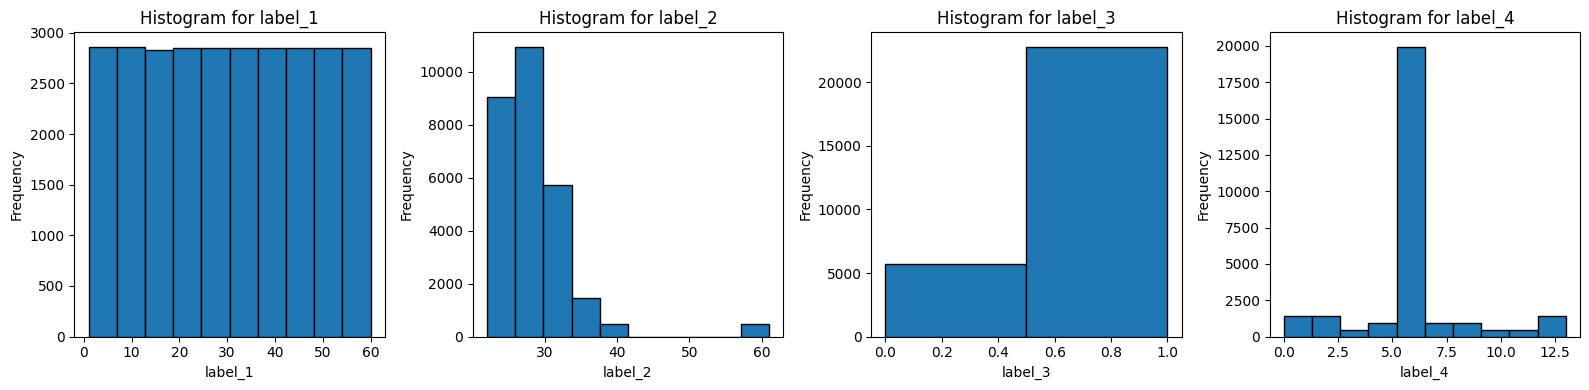

In [20]:
# Create subplots with 1 row and the number of columns equal to the number of labels
fig, axes = plt.subplots(1, len(LABELS), figsize=(16, 4))

# Create histograms and box plots for each label and arrange them horizontally
for i, label in enumerate(LABELS):
    # Histogram
    if(label == 'label_3'):
      axes[i].hist(trainDf[label], bins=2, edgecolor='black')
    else:
      axes[i].hist(trainDf[label], bins=10, edgecolor='black')
    axes[i].set_xlabel(label)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram for {label}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

## Scaling

Scaling the data using the standard scaler. This will be changed later to a better scaler.

### Label 1

In [21]:
data_dict = {"label_1" : {},"label_2" : {},"label_3" : {},"label_4" : {}}
tr_df = trainDf
vl_df = validDf
tst_df = testDf

for label in LABELS:
    if (label == 'label_2'):
        tr_df = trainDf[trainDf['label_2'].notna()]
        vl_df = validDf[validDf['label_2'].notna()]
    scaler = StandardScaler()
    data_dict[label]['X_train'] = pd.DataFrame(scaler.fit_transform(tr_df.drop(LABELS, axis = 1)), columns = FEATURES)
    data_dict[label]['Y_train'] = tr_df[label]
    data_dict[label]['X_valid'] = pd.DataFrame(scaler.transform(vl_df.drop(LABELS, axis = 1)), columns = FEATURES)
    data_dict[label]['Y_valid'] = vl_df[label]
    data_dict['X_test'] = pd.DataFrame(scaler.transform(tst_df.drop("ID", axis = 1)), columns = FEATURES)

In [12]:
initial_model = svm.SVC(kernel = 'rbf', random_state = 42)
for label in LABELS:
    initial_model.fit(data_dict[label]['X_train'], data_dict[label]['Y_train'])
    y_pred = initial_model.predict(data_dict[label]['X_valid'])
    print(label,"_accuracy : ",metrics.accuracy_score(data_dict[label]['Y_valid'] ,y_pred))

label_1 _accuracy :  0.932
label_2 _accuracy :  0.9008152173913043
label_3 _accuracy :  1.0
label_4 _accuracy :  0.9402173913043478


### Hyperparameter Tuning for all 4 lables

In [22]:
model = svm.SVC(kernel='rbf', random_state = 42)
# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma' : ['scale','auto']
}

# Create a HalvingGridSearchCV instance
search = HalvingGridSearchCV(model, param_grid, cv=5, factor=3, verbose=1, scoring='accuracy',n_jobs=7)

# Fit the search to your training data
for label in LABELS:
    search.fit(data_dict[label]['X_train'], data_dict[label]['Y_train'])

    # Get the best hyperparameters and best model
    best_params = search.best_params_
    best_model = search.best_estimator_

    # Evaluate the best model on the validation set
    accuracy = best_model.score(data_dict[label]['X_valid'], data_dict[label]['Y_valid'])

    print(label,"_Best C:", best_params['C'])
    print(label,"_Best Gamma:", best_params['gamma'])
    print(label,"_Validation Accuracy:", accuracy)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 3168
max_resources_: 28520
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 10
n_resources: 3168
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 1
n_candidates: 4
n_resources: 9504
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 2
n_candidates: 2
n_resources: 28512
Fitting 5 folds for each of 2 candidates, totalling 10 fits
label_1 _Best C: 100
label_1 _Best Gamma: auto
label_1 _Validation Accuracy: 0.9733333333333334
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 3115
max_resources_: 28040
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 10
n_resources: 3115
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 1
n_candidates: 4
n_resources: 9345
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 2
n_candidates: 2
n

In [23]:
label_1_model = svm.SVC(kernel='rbf', random_state = 42, C= 100, gamma= 'auto')
label_1_model.fit(data_dict['label_1']['X_train'], data_dict['label_1']['Y_train'])
y_test_pred = label_1_model.predict(data_dict['X_test'])
df = pd.DataFrame(y_test_pred, columns=['label_1'])
print(df)
df.to_csv('label_1_halving_svm.csv', index=False)

     label_1
0         26
1         18
2         16
3          7
4         58
..       ...
739       31
740       35
741       54
742       38
743       51

[744 rows x 1 columns]


In [24]:
label_2_model = svm.SVC(kernel='rbf', random_state = 42, C= 10, gamma= 'auto')
label_2_model.fit(data_dict['label_2']['X_train'], data_dict['label_2']['Y_train'])
y_test_pred = label_2_model.predict(data_dict['X_test'])
df = pd.DataFrame(y_test_pred, columns=['label_2'])
print(df)
df.to_csv('label_2_halving_svm.csv', index=False)

     label_2
0       22.0
1       25.0
2       30.0
3       27.0
4       29.0
..       ...
739     24.0
740     24.0
741     27.0
742     32.0
743     26.0

[744 rows x 1 columns]


In [25]:
label_3_model = svm.SVC(kernel='rbf', random_state = 42, C= 100, gamma= 'auto')
label_3_model.fit(data_dict['label_3']['X_train'], data_dict['label_3']['Y_train'])
y_test_pred = label_3_model.predict(data_dict['X_test'])
df = pd.DataFrame(y_test_pred, columns=['label_3'])
print(df)
df.to_csv('label_3_halving_svm.csv', index=False)

     label_3
0          0
1          1
2          1
3          1
4          0
..       ...
739        1
740        1
741        1
742        1
743        1

[744 rows x 1 columns]


In [26]:
label_4_model = svm.SVC(kernel='rbf', random_state = 42, C= 10, gamma= 'scale')
label_4_model.fit(data_dict['label_4']['X_train'], data_dict['label_4']['Y_train'])
y_test_pred = label_4_model.predict(data_dict['X_test'])
df = pd.DataFrame(y_test_pred, columns=['label_4'])
print(df)
df.to_csv('label_4_halving_svm.csv', index=False)

     label_4
0          2
1          8
2          6
3          6
4          6
..       ...
739        6
740        2
741        6
742       12
743        6

[744 rows x 1 columns]


### Feature Engineering

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 0.99, svd_solver= 'full')
pca.fit(X_train)
X_train_after_pca = pd.DataFrame(pca.transform(X_train))
X_valid_after_pca = pd.DataFrame(pca.transform(X_valid))
X_test_after_pca = pd.DataFrame(pca.transform(X_test))
print(X_train_after_pca.shape)

(28520, 572)


In [19]:
model_after_pca = svm.SVC(kernel = 'linear')
model_after_pca.fit(X_train_after_pca, Y_train)
y_pred_after_pca = model_after_pca.predict(X_valid_after_pca)
print(metrics.confusion_matrix(Y_valid,y_pred_after_pca))
print(metrics.accuracy_score(Y_valid,y_pred_after_pca))
print(metrics.precision_score(Y_valid,y_pred_after_pca, average = 'weighted'))
print(metrics.recall_score(Y_valid,y_pred_after_pca, average = 'weighted'))

[[13  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 18  0  0]
 [ 0  0  0 ...  0  9  0]
 [ 0  0  0 ...  0  0  8]]
0.9306666666666666
0.9367823435823436
0.9306666666666666


In [ ]:
# Create a KNN model with k=5
k = 14
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, Y_train)
y_pred = model.predict(X_valid)

conf_matrix = metrics.confusion_matrix(Y_valid, y_pred)
accuracy = metrics.accuracy_score(Y_valid, y_pred)
precision = metrics.precision_score(Y_valid, y_pred, average='weighted')
recall = metrics.recall_score(Y_valid, y_pred, average='weighted')

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Confusion Matrix:
 [[11  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ... 20  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  1  0  8]]
Accuracy: 0.8386666666666667
Precision: 0.8581931570666813
Recall: 0.8386666666666667
